In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
col = ['fLength','fWidth','fSize','fConc','fConc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist','class']
df = pd.read_csv('magic04.data', names=col)

In [3]:
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [4]:
df['class'].unique()

array(['g', 'h'], dtype=object)

In [5]:
df['class'] = (df['class'] == 'g').astype(int)

In [6]:
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1

In [7]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df , test_size = .2, random_state=42)

In [8]:
train_set

fLength   fWidth   fSize   fConc  fConc1    fAsym  fM3Long  fM3Trans  \
2499   30.3038  10.7505  2.5205  0.4284  0.2730  -0.3839 -12.6961   -4.3567   
7958   25.1106  12.9009  2.4472  0.4714  0.2589  21.5544   8.8261   -7.4514   
7664   24.0236  15.8415  2.5746  0.4154  0.2463  19.9012  -7.7529    4.4604   
218    46.5588  28.6929  3.3971  0.1864  0.0996  17.6816  46.0987   10.2050   
14575  15.1501  14.8593  2.2314  0.7604  0.3815  21.3058  -3.0300   -8.2226   
...        ...      ...     ...     ...     ...      ...      ...       ...   
11284  31.9212  16.7667  2.6566  0.3837  0.2348   3.7913  21.0170    3.4354   
11964  43.4538  17.6541  2.9965  0.2621  0.1426 -12.4850 -23.2863  -11.3567   
5390   19.9926  12.0866  2.4354  0.5725  0.3982  16.1410  16.3239    9.4374   
860    31.4336  23.2651  2.9340  0.2957  0.1717  -9.1278  19.8518   19.2893   
15795  50.8745  10.5763  2.5244  0.3663  0.1858  63.2724  45.5987  -13.1514   

        fAlpha     fDist  class  
2499   66.0740  131.1520      1  
7958   26.4601  155.6730      1  
7664   30.7437  132.4110      1  
218    12.7270  107.7470      1  
14575  62.8494  254.0879      0  
...        ...       ...    ...  
11284   3.0450  249.3750      1  
11964   6.2607  184.7290      1  
5390   12.7719  193.8930      1  
860    79.9590   23.2363      1  
15795  59.6781  158.4316      0  

[15216 rows x 11 columns]

In [9]:
print("train set",len(train_set),"\ntest set", len(test_set))

train set 15216 
test set 3804


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020 entries, 0 to 19019
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fLength   19020 non-null  float64
 1   fWidth    19020 non-null  float64
 2   fSize     19020 non-null  float64
 3   fConc     19020 non-null  float64
 4   fConc1    19020 non-null  float64
 5   fAsym     19020 non-null  float64
 6   fM3Long   19020 non-null  float64
 7   fM3Trans  19020 non-null  float64
 8   fAlpha    19020 non-null  float64
 9   fDist     19020 non-null  float64
 10  class     19020 non-null  int32  
dtypes: float64(10), int32(1)
memory usage: 1.5 MB


In [11]:
df.describe()

fLength        fWidth         fSize         fConc        fConc1  \
count  19020.000000  19020.000000  19020.000000  19020.000000  19020.000000   
mean      53.250154     22.180966      2.825017      0.380327      0.214657   
std       42.364855     18.346056      0.472599      0.182813      0.110511   
min        4.283500      0.000000      1.941300      0.013100      0.000300   
25%       24.336000     11.863800      2.477100      0.235800      0.128475   
50%       37.147700     17.139900      2.739600      0.354150      0.196500   
75%       70.122175     24.739475      3.101600      0.503700      0.285225   
max      334.177000    256.382000      5.323300      0.893000      0.675200   

              fAsym       fM3Long      fM3Trans        fAlpha         fDist  \
count  19020.000000  19020.000000  19020.000000  19020.000000  19020.000000   
mean      -4.331745     10.545545      0.249726     27.645707    193.818026   
std       59.206062     51.000118     20.827439     26.103621     74.731787   
min     -457.916100   -331.780000   -205.894700      0.000000      1.282600   
25%      -20.586550    -12.842775    -10.849375      5.547925    142.492250   
50%        4.013050     15.314100      0.666200     17.679500    191.851450   
75%       24.063700     35.837800     10.946425     45.883550    240.563825   
max      575.240700    238.321000    179.851000     90.000000    495.561000   

              class  
count  19020.000000  
mean       0.648370  
std        0.477492  
min        0.000000  
25%        0.000000  
50%        1.000000  
75%        1.000000  
max        1.000000

In [12]:
import matplotlib.pyplot as plt
df.hist(bins = 50 , figsize=(12, 20))

array([[<Axes: title={'center': 'fLength'}>,
        <Axes: title={'center': 'fWidth'}>,
        <Axes: title={'center': 'fSize'}>],
       [<Axes: title={'center': 'fConc'}>,
        <Axes: title={'center': 'fConc1'}>,
        <Axes: title={'center': 'fAsym'}>],
       [<Axes: title={'center': 'fM3Long'}>,
        <Axes: title={'center': 'fM3Trans'}>,
        <Axes: title={'center': 'fAlpha'}>],
       [<Axes: title={'center': 'fDist'}>,
        <Axes: title={'center': 'class'}>, <Axes: >]], dtype=object)

In [13]:
test_set['fLength'].value_counts()

fLength
19.1572     2
12.7148     2
19.3469     2
18.4343     2
31.1218     2
           ..
47.8108     1
20.4262     1
138.0850    1
15.9660     1
34.0466     1
Name: count, Length: 3792, dtype: int64

In [14]:
corr_matrix = df.corr()
corr_matrix['class'].sort_values(ascending=False)

class       1.000000
fM3Long     0.193409
fAsym       0.173587
fConc       0.024615
fConc1      0.004797
fM3Trans   -0.003837
fDist      -0.065203
fSize      -0.117795
fWidth     -0.265596
fLength    -0.307572
fAlpha     -0.460979
Name: class, dtype: float64

<Axes: xlabel='fAlpha', ylabel='class'>

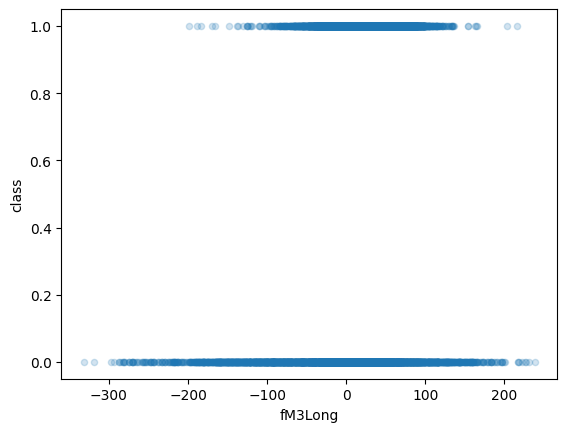

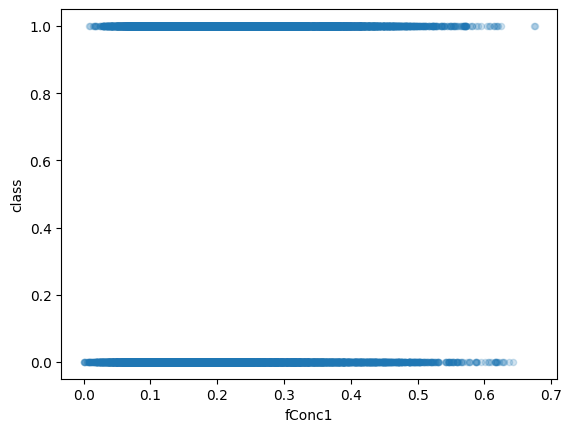

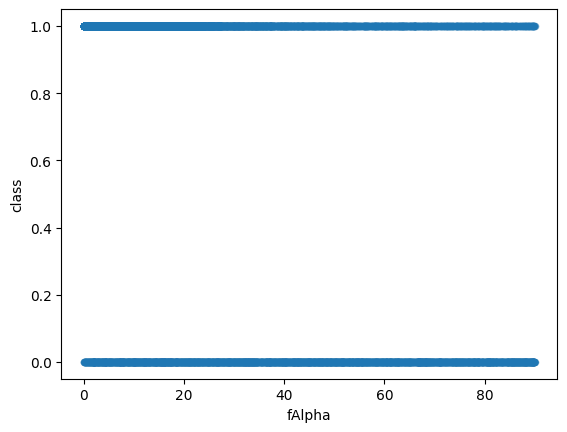

In [15]:
df.plot(kind= 'scatter' , x ='fM3Long', y = 'class', alpha = 0.2)
df.plot(kind= 'scatter' , x ='fConc1', y = 'class', alpha = 0.2)
df.plot(kind= 'scatter' , x ='fAlpha', y = 'class', alpha = 0.2)

In [16]:
df = train_set.drop(['class'], axis = 1)
df_labels = train_set['class'].copy()

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = 'median')),
    ('std_scaler', StandardScaler()),
])

In [18]:
df_tr = my_pipeline.fit_transform(df)

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# model = LinearRegression()
# model = DecisionTreeRegressor()
model = RandomForestRegressor()

model.fit(df_tr, df_labels)

RandomForestRegressor()

In [20]:
some_data = df.iloc[:5]
some_labels = df_labels.iloc[:5]
prepared_data = my_pipeline.transform(some_data)

In [21]:
print(prepared_data)

[[-0.54294179 -0.62738866 -0.64590104  0.26051989  0.52311744  0.0645751
  -0.46014325 -0.21610391  1.47665244 -0.8437807 ]
 [-0.66573322 -0.50919261 -0.80101361  0.49466661  0.39620272  0.43577801
  -0.03763703 -0.36543949 -0.04132548 -0.51586452]
 [-0.69143496 -0.34756347 -0.53141822  0.18973135  0.28278956  0.40780535
  -0.36310239  0.2093676   0.12281918 -0.82694425]
 [-0.15859792  0.35880962  1.20910144 -1.05723605 -1.03766366  0.37024902
   0.69406817  0.48657481 -0.56756861 -1.15677275]
 [-0.9012458  -0.40154978 -1.25767518  2.06835036  1.49973076  0.43157162
  -0.27038628 -0.40265395  1.35308795  0.80022527]]


In [22]:
model.predict(prepared_data)

array([0.64, 1.  , 0.97, 0.97, 0.29])

In [23]:
list(some_labels)

[1, 1, 1, 1, 0]

In [24]:
from sklearn.metrics import mean_squared_error
data_predictions = model.predict(df_tr)
mse = mean_squared_error(df_labels, data_predictions)
rmse = np.sqrt(mse)
rmse

0.112945897501217

In [25]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, df_tr, df_labels, scoring="neg_mean_squared_error" ,cv  = 10)
rmse_score = np.sqrt(-scores)
rmse_score

array([0.30843145, 0.30527104, 0.2972228 , 0.29693274, 0.29887217,
       0.29864345, 0.30813088, 0.30903872, 0.31001368, 0.30070015])

In [26]:
def print_scores(scores):
  print("Scores: ", scores)
  print("Mean: ",scores.mean())
  print("Standard Deviation: ",scores.std())

In [27]:
print_scores(rmse_score)

Scores:  [0.30843145 0.30527104 0.2972228  0.29693274 0.29887217 0.29864345
 0.30813088 0.30903872 0.31001368 0.30070015]
Mean:  0.3033257084455293
Standard Deviation:  0.005070273469266041


## Saving the model

In [28]:
from joblib import dump, load
dump(model, 'Magic.joblib')

['Magic.joblib']

## Testing the model

In [30]:
X_test = test_set.drop("class", axis=1)
Y_test = test_set["class"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_predictions)

[0.1  0.95 0.99 ... 0.99 0.91 0.01]


In [31]:
final_rmse

0.3050187027759323